In [1]:
# all imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import data and shuffle it
data = pd.read_csv('../data/Pima_Indian_diabetes.csv');
data = data.sample(frac=1, random_state=15).reset_index(drop=True)
print(data.shape)
print(data.columns)

(768, 9)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [3]:
# split feature and label columns
x = data.iloc[:, :-1]
x_without_preg = data.iloc[:, 1:-1]
Y = data['Outcome']
data.head()
# x_without_preg.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5.0,122.0,86.0,0.0,0.0,34.7,0.290,33.0,0
1,2.0,175.0,88.0,0.0,0.0,22.9,0.326,22.0,0
2,4.0,129.0,86.0,NaN,270.0,35.1,0.231,23.0,0
3,12.0,NaN,62.0,7.0,258.0,27.6,0.926,44.0,1
4,3.0,102.0,44.0,20.0,94.0,30.8,0.400,26.0,0


In [4]:
# split training and testing data
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=15)

In [9]:
X_train.describe()
y_train.describe()

count    537.000000
mean       0.331471
std        0.471181
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Outcome, dtype: float64

In [6]:
X_train = X_train[(X_train['Pregnancies'] >= 0) & (X_train['BloodPressure'] >= 0) & (X_train['SkinThickness'] >= 0) & (X_train['BMI'] >= 0)]
X_train.shape

(484, 8)

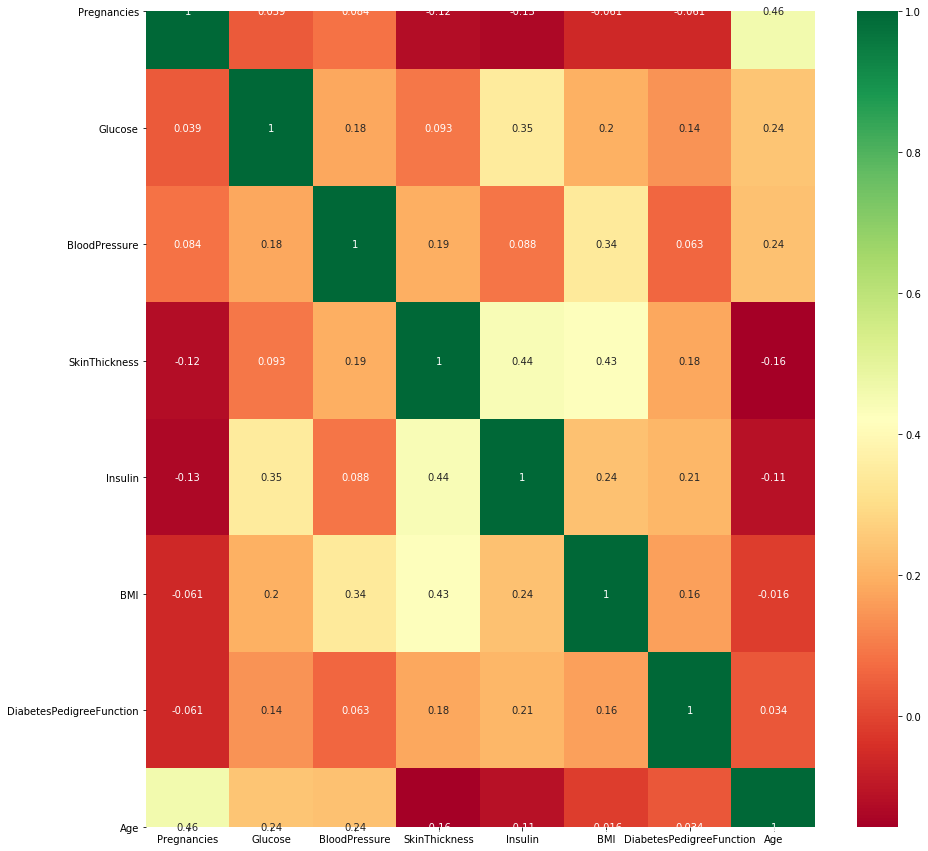

In [7]:
corr_matrix = X_train.corr()
corr_features = corr_matrix.index
plt.figure(figsize=(15, 15))
# print(corr_features)
corr_heat_map = sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn")

In [10]:
y_train.value_counts()

0    359
1    178
Name: Outcome, dtype: int64

In [14]:
X_train.isna().sum()

Pregnancies                  0
Glucose                     13
BloodPressure                0
SkinThickness                0
Insulin                      0
BMI                          0
DiabetesPedigreeFunction     0
Age                         13
dtype: int64